<a href="https://colab.research.google.com/github/Ricardo1356/Student-performance-classifier/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student perfromance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import nan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (
    ColumnTransformer,
    make_column_transformer,
    make_column_selector,
)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


sns.set()

In [ ]:
# df_orig = pd.read_csv('https://is.muni.cz/www/.../student_performance_-_portuguese.csv')
df_orig = pd.read_csv('https://is.muni.cz/www/536587/student_performance_-_math.csv')


In [ ]:
df = df_orig

# <center>Exploratory data analysis</center>

In [ ]:
df.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,435.000000,431.000000,430.000000,430.000000,432.000000,432.000000,430.000000,431.000000,434.000000,430.000000,429.000000,433.000000,433.000000,431.000000,435.000000,435.000000,435.000000
mean,195.845977,16.705336,2.730233,2.525581,1.435185,2.027778,0.327907,3.914153,3.223502,3.104651,1.461538,2.279446,3.535797,5.598608,10.822989,10.609195,10.289655
std,113.094804,1.275510,1.093216,1.087349,0.688293,0.831049,0.730241,0.912221,0.995742,1.103386,0.854640,1.277645,1.402457,7.498148,3.339255,3.822551,4.641901
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,96.000000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,195.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,10.000000,11.000000
75%,293.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Insted of object types, we would like to have category data
object_cols = df.select_dtypes("object").columns
df[object_cols] = df[object_cols].astype("category")

In [ ]:
# Id wont be needed
df = df.drop(columns=['id'])
# Check for null values
df.isnull().sum().sum()

110

We can see a lot of null values, deleting them would result in a loss of lot of information, we will impute them later.

In [ ]:
# For a quick look at the data, copy the dataset without missing values.
df_no_null = df
df_no_null.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16.0,U,GT3,T,4.0,3.0,teacher,other,...,3.0,4.0,3.0,2.0,3.0,3.0,10.0,9,8,8
1,GP,F,16.0,U,LE3,T,1.0,2.0,other,services,...,4.0,4.0,3.0,1.0,1.0,1.0,4.0,8,10,9
2,GP,F,17.0,U,GT3,T,2.0,4.0,services,services,...,5.0,4.0,2.0,2.0,3.0,5.0,0.0,16,17,17
3,GP,F,17.0,U,GT3,T,1.0,1.0,other,other,...,4.0,4.0,4.0,1.0,3.0,1.0,4.0,9,9,10
4,GP,F,16.0,U,GT3,T,1.0,3.0,at_home,services,...,4.0,3.0,5.0,1.0,1.0,3.0,0.0,8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,GP,F,16.0,U,GT3,T,3.0,2.0,other,other,...,1.0,2.0,2.0,1.0,2.0,1.0,14.0,12,13,12
431,GP,F,16.0,U,GT3,T,3.0,1.0,services,other,...,4.0,3.0,3.0,1.0,2.0,5.0,4.0,7,7,6
432,GP,M,17.0,U,GT3,T,3.0,3.0,other,services,...,4.0,3.0,5.0,3.0,5.0,5.0,3.0,14,15,16
433,GP,F,16.0,U,GT3,T,2.0,2.0,services,services,...,1.0,2.0,2.0,1.0,3.0,5.0,14.0,6,9,8


In [ ]:
df = df.drop_duplicates()

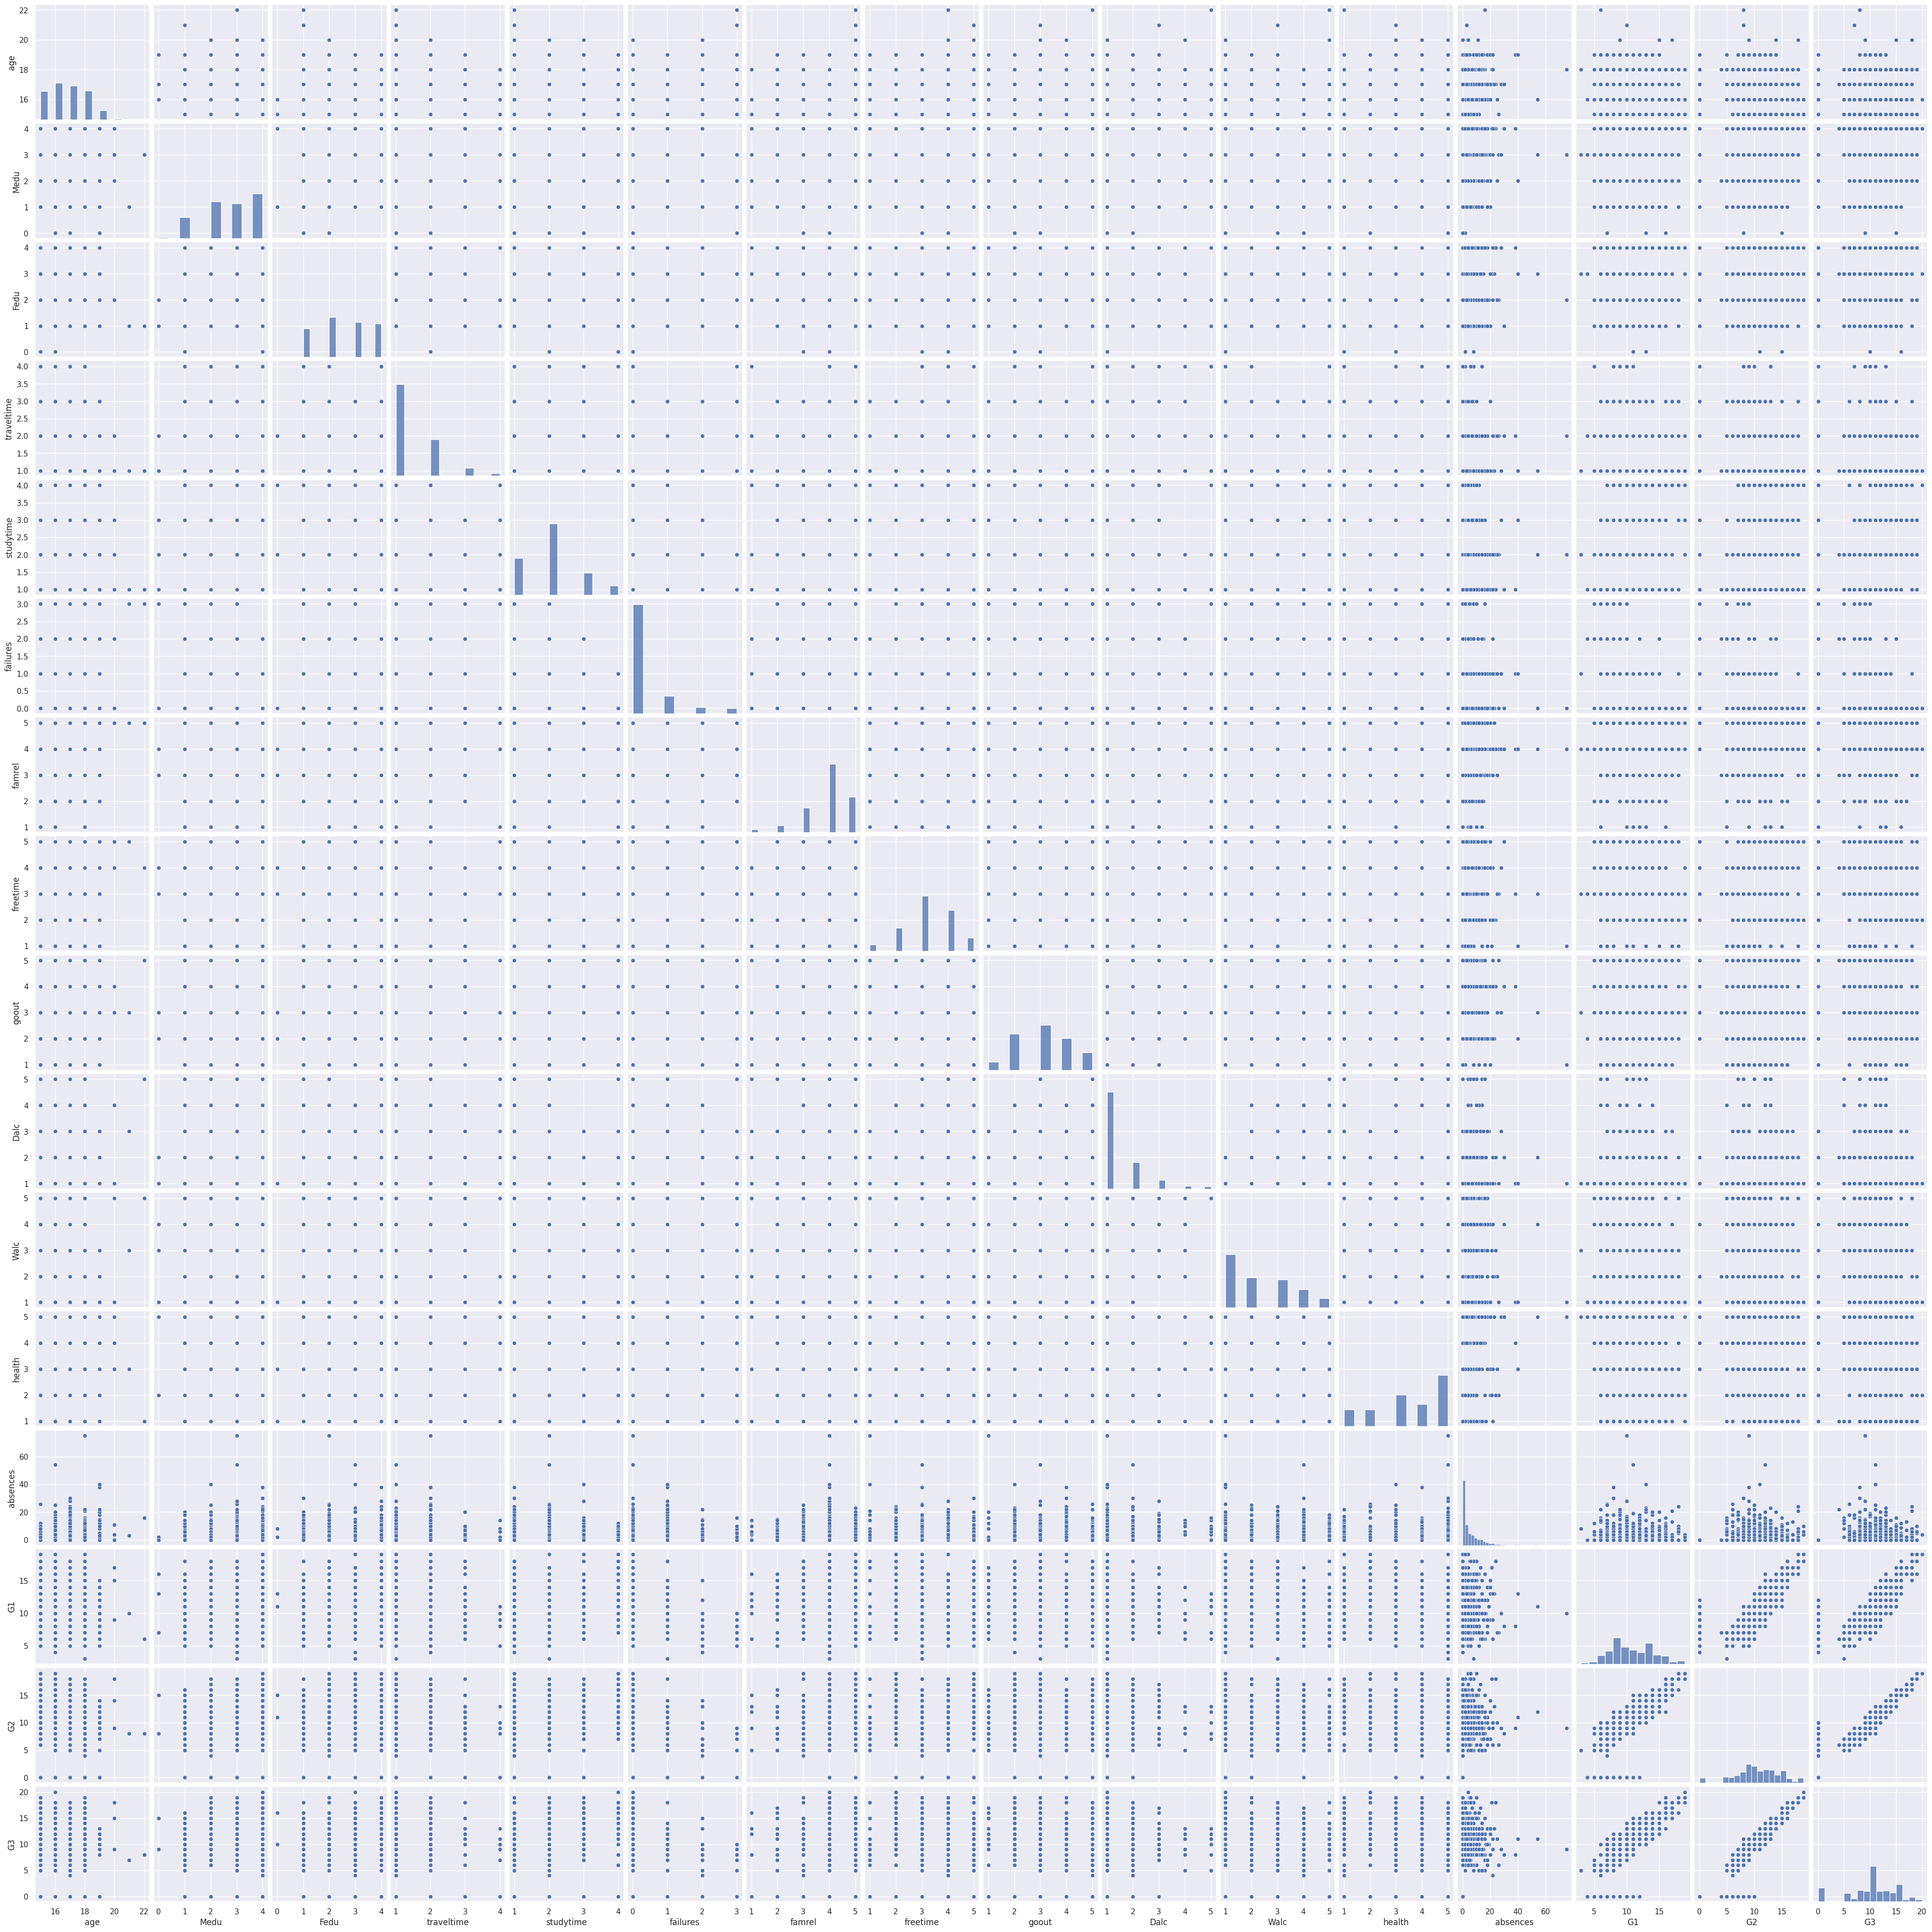

In [ ]:
# As we can see, some columns dont contain numeric values
sns.pairplot(df_no_null.select_dtypes(include=['int64', 'float64']))
plt.show()

This basic graph doesnt tell us much, we can see that grades are highly correlated but thats about it.

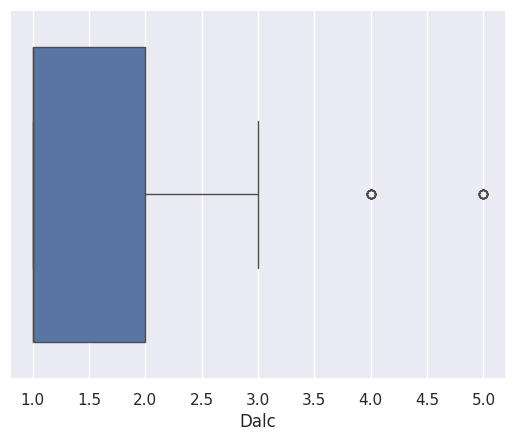

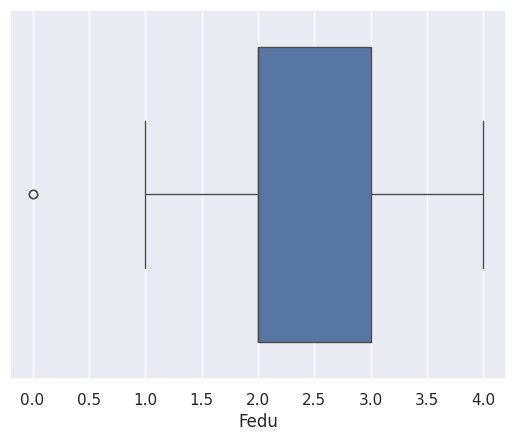

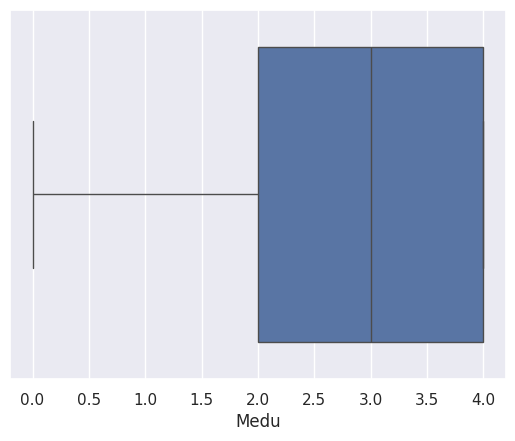

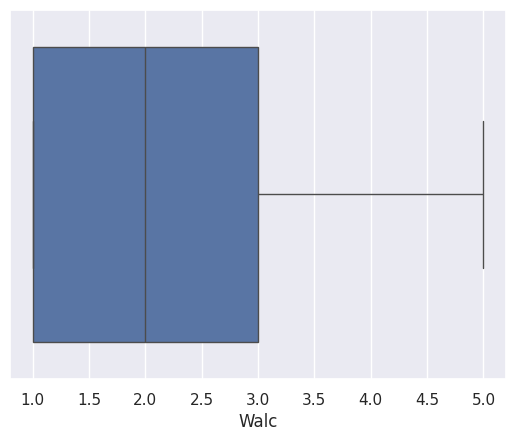

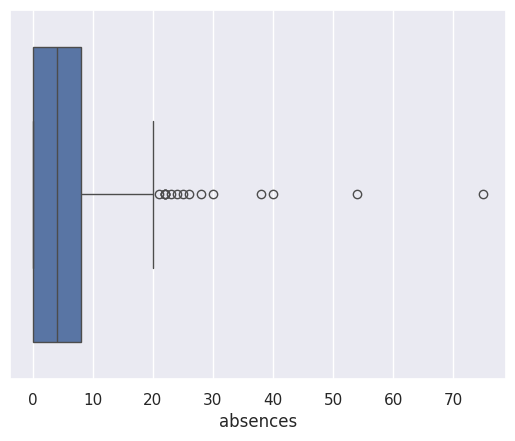

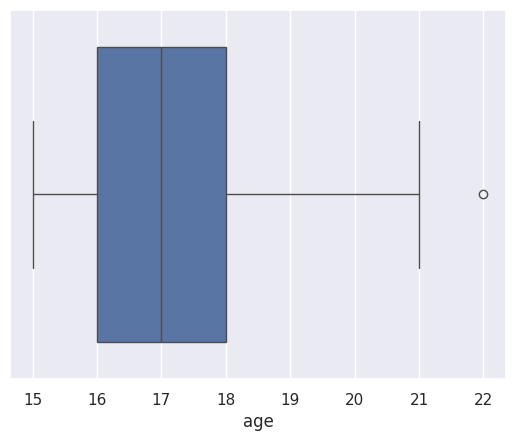

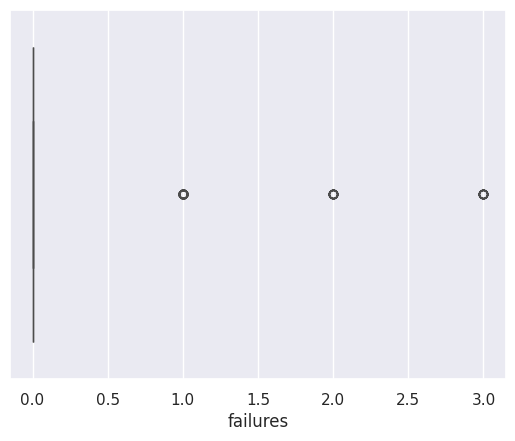

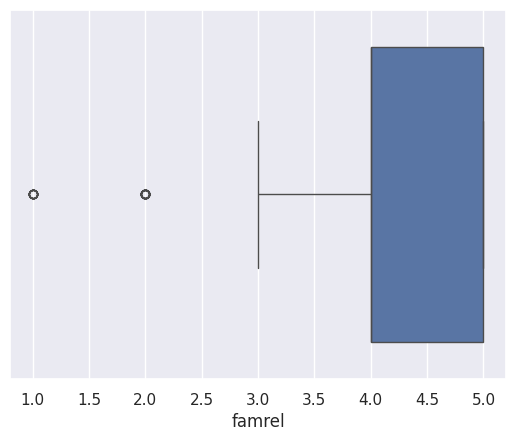

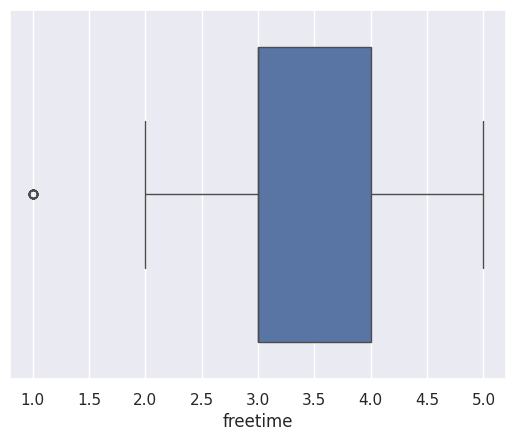

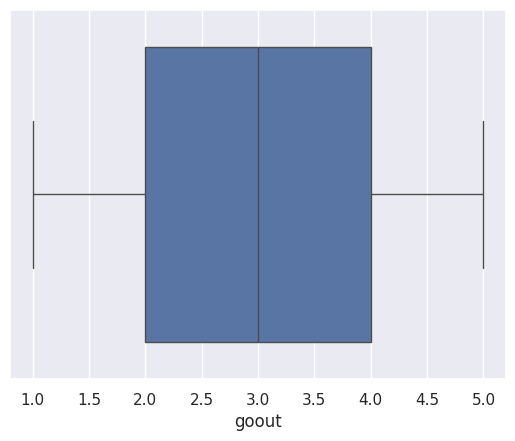

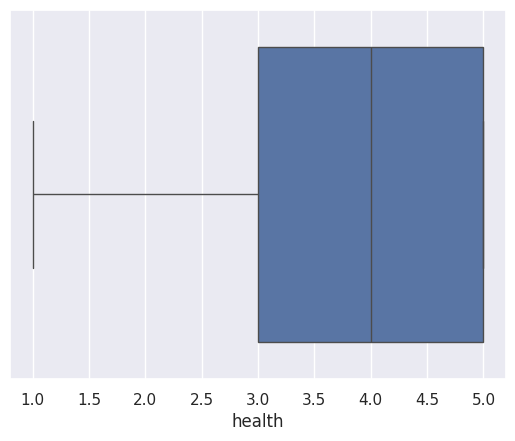

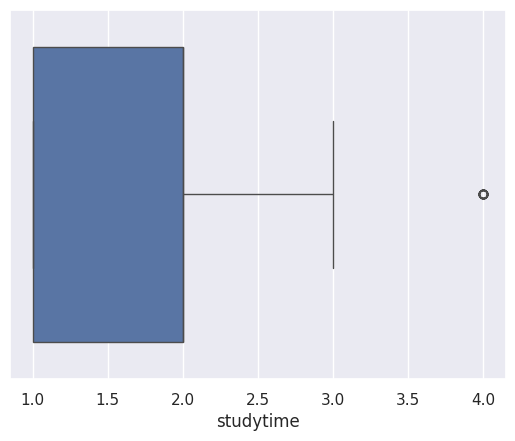

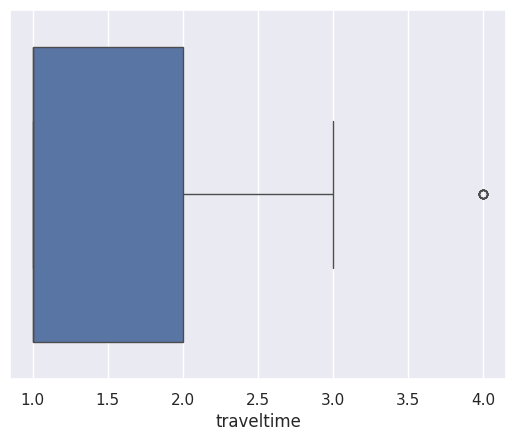

In [ ]:
to_plot = df_no_null.select_dtypes(include=['int64', 'float64'])
columns_to_exclude = ['id', 'G1', 'G2', 'G3', 'grades', 'passfail']
columns_to_plot = to_plot.columns.difference(columns_to_exclude)

for column in columns_to_plot:
  sns.boxplot(x=to_plot[column])
  plt.xlabel(column)
  plt.show()

# df[df.traveltime > 3], df[df.age > 20], df[df.failures > 2]

By examining boxplots, we can some outliers, however most of these values can be realistic. For example, it is possible that some students play lots of sports and have little to no free time, it is even possible that someone was seriously ill, therefore missed 80 hours in the semester.

So what remains questionable are 3 students with age over 20. Then there are 15 people retaking the subject atleast for the third time or the travel time to school more than 1 hour for 18 people, but without more knowledge we cannot say if we identified outliers or not.


We will be predicting final grade, instead of 20 values, lets transform them into 5. We can also try to predict fail/pass.

In [ ]:
def get_grades(row):
    if row > 18:
        return 1
    if row > 15:
        return 2
    if row > 12:
        return 3
    if row > 9:
        return 4
    return 5

def get_pass(row, val):
    if row > val:
        return 1
    else:
        return 0

df['grades'] = df['G3'].apply(get_grades)
df['passfail'] = df['G3'].apply(get_pass, args=(9,))

# G3 will be highly correlated column we need to get rid of
df = df.drop(columns=['G3'])
# Same thing goes for G1 and G2
df = df.drop(columns=['G1'])
df = df.drop(columns=['G2'])

<ipython-input-11-39b92be127e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grades'] = df['G3'].apply(get_grades)
<ipython-input-11-39b92be127e6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passfail'] = df['G3'].apply(get_pass, args=(9,))


Fix most common mistakes to clear data

In [ ]:
need_repl = ['activities', 'famsup', 'higher', 'internet', 'nursery', 'paid', 'romantic', 'schoolsup','sex']
for name in need_repl:
    df[name] = df[name].replace('0', 0).replace('1', 1).replace('sim', 1).replace('não', 0).replace('yes', 1).replace('no', 0)

Plotting pass/fail and grades

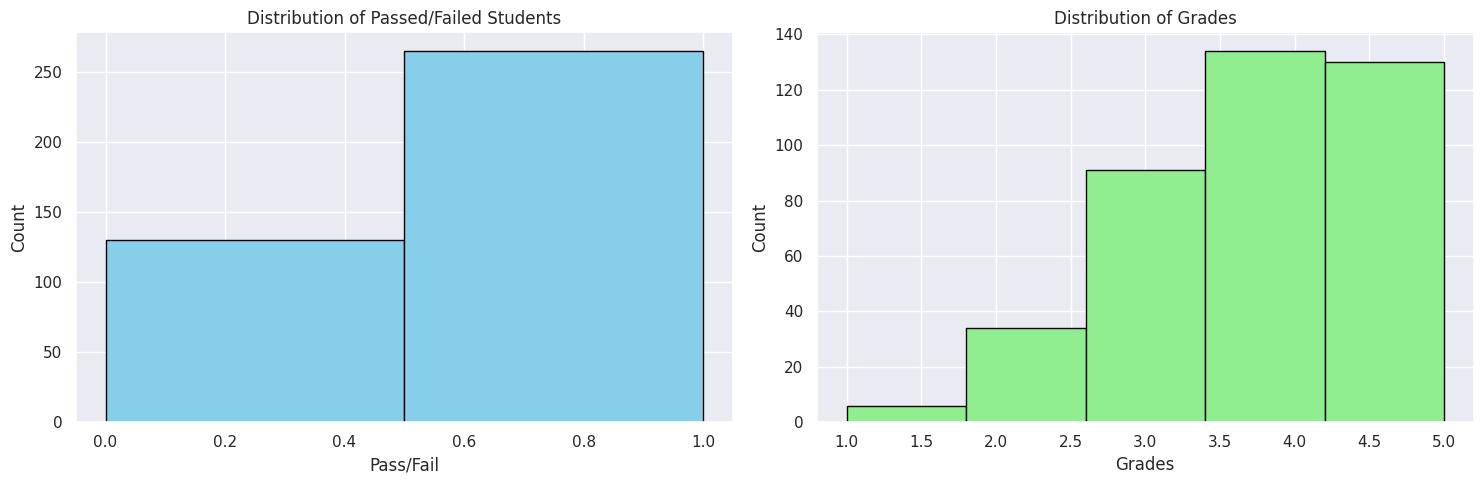

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].hist(df['passfail'], color='skyblue', edgecolor='black', bins=2)
axes[0].set_title('Distribution of Passed/Failed Students')
axes[0].set_xlabel('Pass/Fail')
axes[0].set_ylabel('Count')

axes[1].hist(df['grades'], color='lightgreen', edgecolor='black', bins=5)
axes[1].set_title('Distribution of Grades')
axes[1].set_xlabel('Grades')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

Before any preprocessing split the data into test and train subsets.

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=47)

X_train = train_df.drop(columns=['grades', 'passfail'] , axis=1)
y_train_grades = train_df['grades']
y_train_pass = train_df['passfail']

X_test = test_df.drop(columns=['grades', 'passfail'], axis=1)
y_test_grades = test_df['grades']
y_test_pass = test_df['passfail']


# *Preprocessing*

We would like to also visualize categorical data. Lets run the dataset through a preprocessing pipeline.

In [ ]:
# Will be used for preprocessing in trained models
preprocessing_pipeline = make_pipeline(
        make_column_transformer(
        (SimpleImputer(strategy="mean"), make_column_selector(dtype_include=np.number)),  # Impute numerical columns
        (OneHotEncoder(), make_column_selector(dtype_include="category")),  # Encode categorical columns
        remainder='passthrough'
    )
)
# Only used for visualisation
exploratory_pipeline = make_pipeline(
        make_column_transformer(
            (OrdinalEncoder(), make_column_selector(dtype_include="category")),   # Makes it easier to see encoded values (compared to OneHot)
            remainder='passthrough'
        ),
        SimpleImputer(missing_values=np.nan, strategy="mean"),
)

train_df_exploratory = exploratory_pipeline.fit_transform(train_df)


In [ ]:
# To use transformed dataset in sns etc. we need to cast the data back to DataFrame
feature_names = exploratory_pipeline.named_steps['columntransformer'].get_feature_names_out()

# Remove prefix generated by OrdinalEncoder
new_columns = [name.split('__')[1] if '__' in name else name for name in feature_names]

train_df_encoded = pd.DataFrame(train_df_exploratory, columns=new_columns)
assert(train_df_encoded.isnull().sum().sum() == 0)

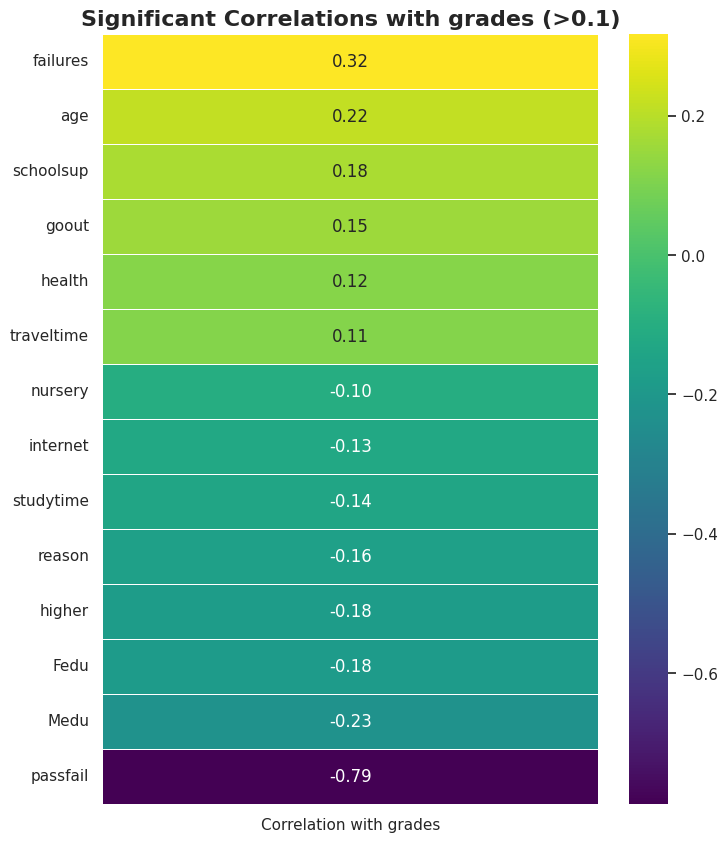

In [ ]:
correlation_matrix = train_df_encoded.corr()

grade_correlation_df = correlation_matrix['grades'].drop('grades').to_frame()
grade_correlation_df.columns = ['Correlation with grades']

significant_corr = grade_correlation_df[grade_correlation_df['Correlation with grades'].abs() > 0.1]
significant_corr = significant_corr.sort_values(by='Correlation with grades', ascending=False)

plt.figure(figsize=(8, 10))
ax = sns.heatmap(significant_corr,
                 annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Significant Correlations with grades (>0.1)', fontsize=16, fontweight='bold')

plt.show()

In [ ]:
sorted_corr = grade_correlation_df['Correlation with grades'].abs().sort_values()

# Lowest correlations
print("Lowest Correlations with grades:")
print(sorted_corr.head(10))

Lowest Correlations with grades:
freetime      0.003571
Fjob          0.005035
activities    0.033192
famrel        0.043483
paid          0.044346
absences      0.050359
Pstatus       0.052226
famsize       0.056398
famsup        0.066316
Mjob          0.068130
Name: Correlation with grades, dtype: float64


# <center>Models</center>

Baseline model

Used for comparing with our trained models.

In [ ]:
pipeline_baseline = make_pipeline(
    preprocessing_pipeline,
    StandardScaler(),
    DummyClassifier(strategy="uniform", random_state=69)     # Completely random
)

pipeline_baseline.fit(X_train, y_train_grades)
y_pred = pipeline_baseline.predict(X_test)

accuracy_b_g = round(accuracy_score(y_test_grades, y_pred), 2)
precision = round(precision_score(y_test_grades, y_pred, average='weighted'), 2)
recall = round(recall_score(y_test_grades, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test_grades, y_pred, average='weighted'), 2)

print("Accuracy:", accuracy_b_g)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

pipeline_baseline.fit(X_train, y_train_pass)
y_pred = pipeline_baseline.predict(X_test)

accuracy_b_p = round(accuracy_score(y_test_pass, y_pred), 2)
precision = round(precision_score(y_test_pass, y_pred, average='weighted', zero_division=0), 2)
recall = round(recall_score(y_test_pass, y_pred, average='weighted'), 2)
f1_b_p = round(f1_score(y_test_pass, y_pred, average='weighted'), 2)

print("Accuracy passfail:", accuracy_b_p)
print("Precision passfail:", precision)
print("Recall passfail:", recall)
print("F1 Score passfail:", f1_b_p)



Accuracy: 0.2
Precision: 0.35
Recall: 0.2
F1 Score: 0.25
Accuracy passfail: 0.46
Precision passfail: 0.57
Recall passfail: 0.46
F1 Score passfail: 0.49


# ***Neural network***

Specifically I will be using multi-layer perceptron (MLP) classifier

MLP consists of several layers of neurons, where each layer is capable of abstracting and capturing specific information from the dataset. Every neuron receives inputs from all the neurons in the preceding layer and sends its output to all the neurons in the subsequent layer.

The learning process involves updating the weights of these inputs, typically through backpropagation, which then aims to minimize an error function. For instance, techniques such as linear regression can be used.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), # This way tweaked the most
                   activation='logistic',
                   shuffle=True,                 # Shuffles the data for each iteration
                   random_state=69)

Scikit-Learn doesn't let you set sizes of the input and output layer, they are by default set to number of features and number of predicted values respectively.

I played with the sizes of hidden layers for a bit and this is the best result I've gotten.

In [ ]:
pipeline_mlp = make_pipeline(
    preprocessing_pipeline,
    PowerTransformer(),             # Math functions inside NN expect normal distribuition
    StandardScaler(),               # Neural networks work better with scaled values
    mlp
)

pipeline_mlp.fit(X_train, y_train_grades)
y_pred = pipeline_mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
accuracy_n_g = round(accuracy_score(y_test_grades, y_pred), 2)
precision = round(precision_score(y_test_grades, y_pred, average='weighted'), 2)
recall = round(recall_score(y_test_grades, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test_grades, y_pred, average='weighted'), 2)

print("Accuracy:", accuracy_n_g)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("------------------------")
pipeline_mlp.fit(X_train, y_train_pass)
y_pred = pipeline_mlp.predict(X_test)

accuracy_n_p = round(accuracy_score(y_test_pass, y_pred), 2)
precision = round(precision_score(y_test_pass, y_pred, average='weighted', zero_division=0), 2)
recall = round(recall_score(y_test_pass, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test_pass, y_pred, average='weighted'), 2)

print("Accuracy passfail:", accuracy_n_p)
print("Precision passfail:", precision)
print("Recall passfail:", recall)
print("F1 Score passfail:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.37
Precision: 0.44
Recall: 0.37
F1 Score: 0.35
------------------------
Accuracy passfail: 0.65
Precision passfail: 0.68
Recall passfail: 0.65
F1 Score passfail: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


*Interpretation*

A MLPClassifier was able to achieve a F1 score just under 0.5. Honestly I expected it to be better.

This is still way better then the baseline model, which achieves a score of only about 0.25.

As for pass/fail, F1 score of 0.84 is fairly good and noticeably better than baseline's 0.6.

#***Support Vector Machine***

SVM is a linear model that partitions the classes such that the margin (distance from the decision boundary to the nearest example class) is maximized.
When the margin is fully described by support vectors, which are the examples from each class that are "closest" to the decision boundary.

C-Support Vector Classification from skleran lets us define which kernel we want to use and specify hyperparameters.

The hyper parameter C, controls the trade-off between bias and variance. High C -> high variance and low distortion.

Gamma in turn determines how far the influence of a single training example extends, a high gamma value leads to a decision boundary that closely follows the training data.

Degree specifies the degree of the polynomial used as the kernel function.

Coef0 adjusts the influence of higher versus lower order terms in the polynomial and sigmoid kernels.

After playing with parameter_grid this is the best performing kernel with hyperparameters:

In [ ]:
svc1 = SVC(
    kernel="rbf",
    C=1,
    gamma='auto',  # or 0.01 (some low value of gamma)
    max_iter=10000
)
# Accuracy:, Precision:, Recall:, F1 Score: (grades/passfail)
# 0.53 0.52 0.53 0.51 / 0.77 0.75 0.77 0.75

Other kernels, with best hyperparameters setup:

In [ ]:
svc = SVC(
    kernel="linear",
    C=0.1,
    max_iter=10000
)
# Accuracy:, Precision:, Recall:, F1 Score: (grades/passfail)
# 0.44 0.44 0.44 0.43 / 0.8 0.78 0.8 0.78

svc2 = SVC(
    kernel="sigmoid",
    C=10,
    gamma='auto',  # 0.1 will do better for grades, 0.01 will do better for passfail
    coef0=1,
    max_iter=10000
)
# Accuracy:, Precision:, Recall:, F1 Score: (grades/passfail)
# 0.48 0.48 0.48 0.46 / 0.75 0.71 0.75 0.7

svc3 = SVC(
    kernel="poly",
    C=1,
    gamma='auto',
    degree=6,
    coef0=1,
    max_iter=10000
)
# Accuracy:, Precision:, Recall:, F1 Score: (grades/passfail)
# 0.46 0.45 0.46 0.43 / 0.77 0.75 0.77 0.73

SVM pipeline with added features:

PolynomialFeatures, this transformation is used to extend the space by adding polynomial combinations,

VarianceThreshold, this throws away all attributes with variance less than the threshold

SelectKBest which keeps only the k most statistically significant attributes

In [ ]:
svm = make_pipeline(
    preprocessing_pipeline,
    PolynomialFeatures(degree=3, include_bias=False),
    VarianceThreshold(threshold=0.1),
    SelectKBest(k=75),
    StandardScaler(),  # sigmoid kernel really needs this scaler! (linear bit too)
    svc1
)

Predict grades

In [ ]:
svm.fit(X_train, y_train_grades)
y_pred = svm.predict(X_test)

accuracy_svm_g = round(accuracy_score(y_test_grades, y_pred), 2)
precision = round(precision_score(y_test_grades, y_pred, average='weighted', zero_division=0), 2)
recall = round(recall_score(y_test_grades, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test_grades, y_pred, average='weighted'), 2)

print("Accuracy grades:", accuracy_svm_g)
print("Precision grades:", precision)
print("Recall grades:", recall)
print("F1 Score grades:", f1)

Accuracy grades: 0.53
Precision grades: 0.52
Recall grades: 0.53
F1 Score grades: 0.51


Predict pass/fail

In [ ]:
svm.fit(X_train, y_train_pass)
y_pred = svm.predict(X_test)

accuracy_svm_p = round(accuracy_score(y_test_pass, y_pred), 2)
precision = round(precision_score(y_test_pass, y_pred, average='weighted', zero_division=0), 2)
recall = round(recall_score(y_test_pass, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test_pass, y_pred, average='weighted'), 2)

print("Accuracy passfail:", accuracy_svm_p)
print("Precision passfail:", precision)
print("Recall passfail:", recall)
print("F1 Score passfail:", f1)

Accuracy passfail: 0.77
Precision passfail: 0.75
Recall passfail: 0.77
F1 Score passfail: 0.75


#***Random Forest***

Random forest is a model, that creates vast amounts of independent **decision trees**. Each decision tree in the forest is built from a random sample of the training data, and to make things even more diversified, each node in a tree uses only a subset of the features when deciding how to split the data. This approach allows each tree to have a slightly different perspective of the data.

Once the forest is built, making predictions is about teamwork among all the trees. During the classification, each tree votes, and the most common class becomes the final prediction. Thanks to the features described above, the whole forest is less likely to overfit than a single tree and generally gives more accurate and reliable predictions.

First, lets try random forrest without any hyperparameter specification


In [ ]:
random_forest = RandomForestClassifier(random_state = 42)

pipeline = make_pipeline(
    preprocessing_pipeline,
    StandardScaler(),
    random_forest
)

pipeline.fit(X_train, y_train_pass)
y_pred = pipeline.predict(X_test)

accuracy = round(accuracy_score(y_test_pass, y_pred), 2)
precision = round(precision_score(y_test_pass, y_pred, average='weighted', zero_division=0), 2)
recall = round(recall_score(y_test_pass, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test_pass, y_pred, average='weighted'), 2)

print("Accuracy passfail:", accuracy)
print("Precision passfail:", precision)
print("Recall passfail:", recall)
print("F1 Score passfail:", f1)

pipeline.fit(X_train, y_train_grades)
y_pred = pipeline.predict(X_test)

print()

accuracy = round(accuracy_score(y_test_grades, y_pred), 2)
precision = round(precision_score(y_test_grades, y_pred, average='weighted', zero_division=0), 2)
recall = round(recall_score(y_test_grades, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test_grades, y_pred, average='weighted'), 2)

print("Accuracy grades:", accuracy)
print("Precision grades:", precision)
print("Recall grades:", recall)
print("F1 Score grades:", f1)

Accuracy passfail: 0.72
Precision passfail: 0.69
Recall passfail: 0.72
F1 Score passfail: 0.7

Accuracy grades: 0.34
Precision grades: 0.38
Recall grades: 0.34
F1 Score grades: 0.32


As we can see, the passfail prediction is about 80%, which is not that bad. However, prediction of exact grade has very little score - all metrics indicate below 40%. Lets try different hyperparameters and their combinations:

In [ ]:
estimators = [100, 200, 300]
depth = [None, 10, 20, 30]
split = [10, 5, 2]

best_passfail_acc = 0
best_grades_acc = 0

for est in estimators:
  for dep in depth:
    for spl in split:

      random_forest = RandomForestClassifier(n_estimators=est, max_depth=dep, min_samples_split=spl, random_state=42)

      pipeline = make_pipeline(
        preprocessing_pipeline,
        StandardScaler(),
        random_forest
      )
      #print(f"n_estimators: {est}, max_depth: {dep}, min_samples_split: {spl}")

      pipeline.fit(X_train, y_train_pass)
      y_pred = pipeline.predict(X_test)
      acc = round(accuracy_score(y_test_pass, y_pred), 2)
      #print("Accuracy passfail:", round(accuracy_score(y_test_pass, y_pred), 2))
      if (acc > best_passfail_acc):
        best_passfail_acc = acc
        best_passfail_settings = [est, dep, spl]

      pipeline.fit(X_train, y_train_grades)
      y_pred = pipeline.predict(X_test)
      acc = round(accuracy_score(y_test_grades, y_pred), 2)
      #print("Accuracy grades:", round(accuracy_score(y_test_grades, y_pred), 2))
      if (acc > best_grades_acc):
        best_grades_acc = acc
        best_grades_settings = [est, dep, spl]


print(f"Best settings for passfail is: n_estimators: {best_passfail_settings[0]}, max_depth: {best_passfail_settings[1]}, min_samples_split: {best_passfail_settings[2]}\n accuracy = {best_passfail_acc}")
print(f"Best settings for grades is: n_estimators: {best_grades_settings[0]}, max_depth: {best_grades_settings[1]}, min_samples_split: {best_grades_settings[2]}\n accuracy = {best_grades_acc}")





Best settings for passfail is: n_estimators: 100, max_depth: 10, min_samples_split: 2
 accuracy = 0.77
Best settings for grades is: n_estimators: 100, max_depth: 10, min_samples_split: 2
 accuracy = 0.41


The best accuracy we get is 49%. This is not optimal and can be caused by various factors. First of them can be the model selection itself alongside with the data. Thanks to realtively low correlations and nature of the decision trees, the nodes do not have much information gain when deciding resulting in poor performance.

There is another interesting fact - parameters with the highest accuracy result in shallow, sparse and conservative forest. This shows, that the model does not lean towards overfitting, which is a good sign for both grades and passfail prediction

#***Comparision of the models and conclusion***

We tried 3 different models - **Neural Network, SVM and Random Forrest**. As we can see in the graph. Chosen metrics is accuracy, which measures amount of correctly classified classes divided by all examples. All models scored better accuracy than the baseline model, which makes sense. The best performing models for pass/fail classification turned to be SVM and Random Forrest with the same 77% accuracy. Interrestingly, the Neural Network scored only 62% which is not that good, given that pass/fail is a binary classification.

In the Grade classification, the baseline model performed really poorly and all ouf our models performed much better, over 40%. Only model, that scored more that 50% was the SVM, thanks to the amount of available features, which really benefits SVM and on the other side, can make classification hard for the other models


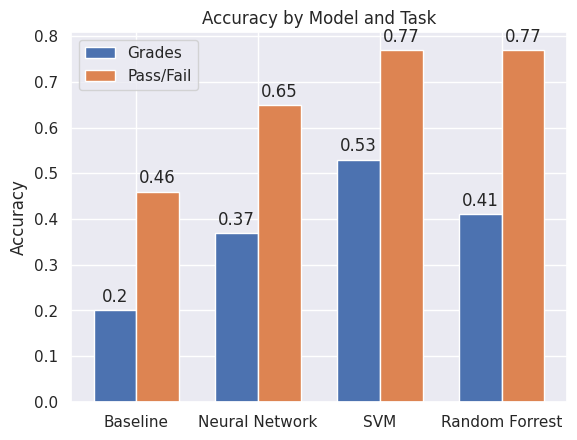

In [ ]:
models = ['Baseline', 'Neural Network', 'SVM', 'Random Forrest']

# Accuracy scores for "grades" task
accuracy_grades = [accuracy_b_g, accuracy_n_g, accuracy_svm_g, best_grades_acc]

# Accuracy scores for "pass/fail" task
accuracy_passfail = [accuracy_b_p, accuracy_n_p, accuracy_svm_p, best_passfail_acc]

positions = np.arange(len(models))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Plotting both grades and pass/fail data
rects1 = ax.bar(positions - width/2, accuracy_grades, width, label='Grades')
rects2 = ax.bar(positions + width/2, accuracy_passfail, width, label='Pass/Fail')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Task')
ax.set_xticks(positions)
ax.set_xticklabels(models)
ax.legend()

# A function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Finally, show the plot
plt.show()